In [1]:
'''
This file contains residual plots for first and second best and worst models
Display mean and standard deviation of the plots
'''

'\nThis file contains residual plots for first and second best and worst models\nDisplay mean and standard deviation of the plots\n'

In [1]:
import pandas as pd
import seaborn as sns; sns.set_color_codes()
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings('ignore')
from scipy.stats import kstest

In [2]:
def set_style(ax):
    i=0
    for x in ax:
    #     Despine
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)

        # Switch off ticks
        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

        # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

        # Remove title
        x.set_title("")

        # Set x-axis label
#         print(i)
        if i==0:
            xlabel="Residuals for PQ"
        else:
            xlabel="Residuals for ATT"
        x.set_xlabel(xlabel,labelpad=20, weight='bold', size=12)
        i=i+1
        
        # Set y-axis label
    #     x.set_ylabel("Sessions", labelpad=20, weight='bold', size=12)

        # Format y-axis label
#         x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))
    

Study 1
---

In [4]:
'''
STUDY1
for PQ:
---Best---
1st - MARS for GA_Original_PCA_0.80PC
2nd - MARS for GA_Original_PCA_0.95PC
---worst--
1st - LR for PCA_Transformed_0.95PC
2nd - Lasso for GA_Transformed_PCA_0.80PC
'''

'\nSTUDY1\nfor PQ:\n---Best---\n1st - MARS for GA_Original_PCA_0.80PC\n2nd - MARS for GA_Original_PCA_0.95PC\n---worst--\n1st - LR for PCA_Transformed_0.95PC\n2nd - Lasso for GA_Transformed_PCA_0.80PC\n'

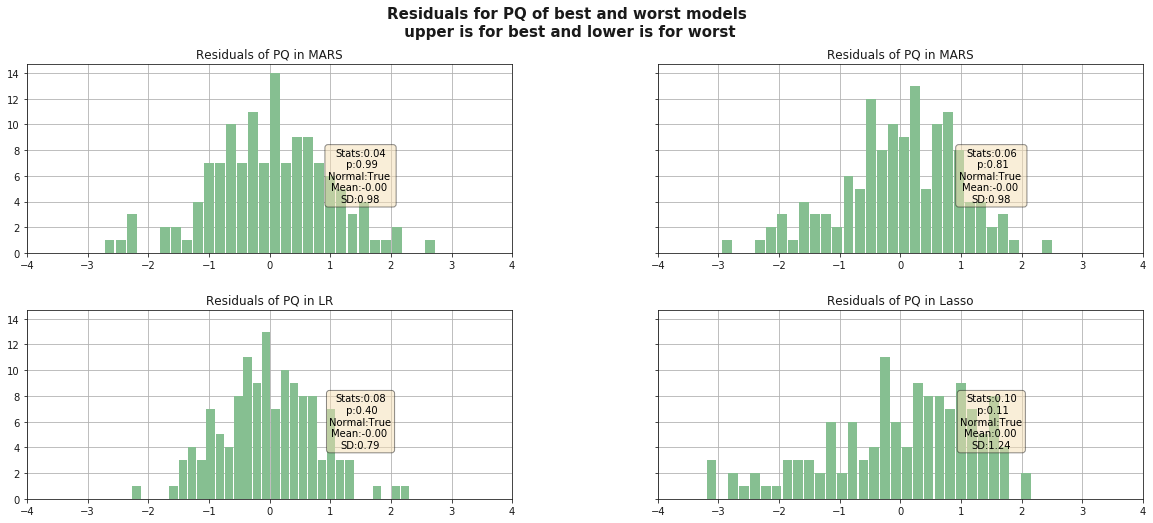

In [9]:
# for PQ

# best models
xl_best1 = pd.read_excel('study1_feature_selection_alltargets_mahalanobis_PCA_0.8_predictions.xlsx',sheet_name='MARS')
xl_best2 = pd.read_excel('study1_feature_selection_alltargets_mahalanobis_PCA_0.95_predictions.xlsx',
                      sheet_name='MARS')

# worst models
xl_worst1 = pd.read_excel('study1_PCA_alltargets_mahalanobis_transformed_0.95_predictions.xlsx',sheet_name='LR')
xl_worst2 = pd.read_excel('study1_PCA_alltargets_mahalanobis_transformed_0.8_predictions.xlsx',sheet_name='Lasso Regression')

fig ,ax = plt.subplots(2,2,figsize=(20,8),sharey=True)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# best models
xl_best1.hist(column='Residuals_PQ', bins=30, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][0])
ax[0][0].set_xlim((-4, 4))
stats, p = kstest(xl_best1['Residuals_PQ'],'norm')
mean = xl_best1['Residuals_PQ'].mean()
sd = xl_best1['Residuals_PQ'].std()
# place text
ax[0][0].text(1.5,max(ax[0][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f\nNormal:%s \nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[0][0].set_title('Residuals of PQ in MARS')

stats, p = kstest(xl_best2['Residuals_PQ'],'norm')
mean = xl_best2['Residuals_PQ'].mean()
sd = xl_best2['Residuals_PQ'].std()
xl_best2.hist(column='Residuals_PQ', bins=30, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][1])
ax[0][1].text(1.5,max(ax[0][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f\nNormal:%s \nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[0][1].set_title('Residuals of PQ in MARS')
ax[0][1].set_xlim((-4, 4))


# worst models
stats, p = kstest(xl_worst1['Residuals_PQ'],'norm')
mean = xl_worst1['Residuals_PQ'].mean()
sd = xl_worst1['Residuals_PQ'].std()
xl_worst1.hist(column='Residuals_PQ', bins=30, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][0])
ax[1][0].text(1.5,max(ax[1][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f\nNormal:%s\nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[1][0].set_xlim((-4, 4))
xl_worst2.hist(column='Residuals_PQ', bins=30, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][1])
stats, p = kstest(xl_worst2['Residuals_PQ'],'norm')
mean = xl_worst2['Residuals_PQ'].mean()
sd = xl_worst2['Residuals_PQ'].std()
ax[1][1].text(1.5,max(ax[1][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f\nNormal:%s\nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[1][1].set_xlim((-4, 4))
# set_style(ax)
ax[1][0].set_title('Residuals of PQ in LR')
ax[1][1].set_title('Residuals of PQ in Lasso')

fig.suptitle("Residuals for PQ of best and worst models\n upper is for best and lower is for worst",weight='bold',fontsize=15)
plt.show()

In [6]:
'''for ATT:
---Best---
1st - MARS for GA_Original_PCA_0.80PC
2nd - SVM for GA_Original_PCA_0.80PC
---worst--
1st - LR for GA_Transformed_PCA_0.95PC
2nd - Lasso PCA_Transformed_PCA_0.80PC'''

'for ATT:\n---Best---\n1st - MARS for GA_Original_PCA_0.80PC\n2nd - SVM for GA_Original_PCA_0.80PC\n---worst--\n1st - LR for GA_Transformed_PCA_0.95PC\n2nd - Lasso PCA_Transformed_PCA_0.80PC'

Text(0.5,0.98,'Residuals for ATT of best and worst models\n upper is for best and lower is for worst')

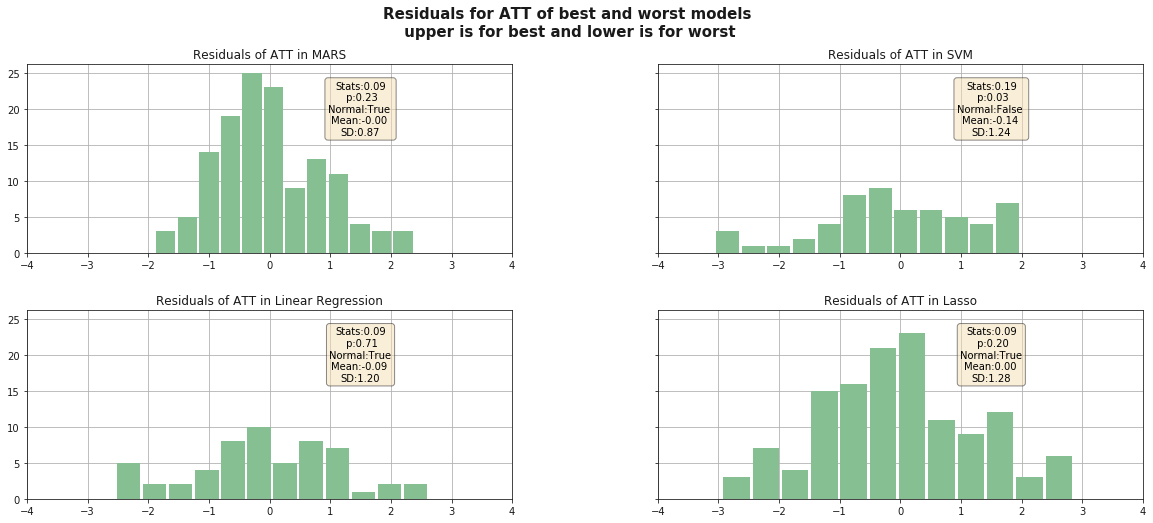

In [7]:
# for ATT

# best models
xl_best1 = pd.read_excel('study1_feature_selection_alltargets_mahalanobis_PCA_0.8_predictions.xlsx',sheet_name='MARS')
xl_best2 = pd.read_excel('study1_feature_selection_alltargets_mahalanobis_PCA_0.8_predictions.xlsx',
                      sheet_name='SVM')

# worst models
xl_worst1 = pd.read_excel('study1_feature_selection_alltargets_mahalanobis_transformed_PCA_0.95_predictions.xlsx',
                          sheet_name='Linear Regression')
xl_worst2 = pd.read_excel('study1_PCA_alltargets_mahalanobis_transformed_0.8_predictions.xlsx',sheet_name='Lasso Regression')

fig ,ax = plt.subplots(2,2,figsize=(20,8),sharey=True)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# best models
xl_best1.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][0])
stats, p = kstest(xl_best1['Residuals_ATT'],'norm')
mean = xl_best1['Residuals_ATT'].mean()
sd = xl_best1['Residuals_ATT'].std()
# place text
ax[0][0].text(1.5,max(ax[0][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f\nNormal:%s \nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[0][0].set_title('Residuals of ATT in MARS')
ax[0][0].set_xlim((-4, 4))

stats, p = kstest(xl_best2['Residuals_ATT'],'norm')
mean = xl_best2['Residuals_ATT'].mean()
sd = xl_best2['Residuals_ATT'].std()
xl_best2.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][1])
ax[0][1].text(1.5,max(ax[0][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f\nNormal:%s \nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[0][1].set_title('Residuals of ATT in SVM')
ax[0][1].set_xlim((-4, 4))


# worst models
stats, p = kstest(xl_worst1['Residuals_PQ'],'norm')
mean = xl_worst1['Residuals_ATT'].mean()
sd = xl_worst1['Residuals_ATT'].std()
xl_worst1.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][0])
ax[1][0].text(1.5,max(ax[1][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f\nNormal:%s\nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
xl_worst2.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][1])
ax[1][0].set_xlim((-4, 4))

stats, p = kstest(xl_worst2['Residuals_ATT'],'norm')
mean = xl_worst2['Residuals_ATT'].mean()
sd = xl_worst2['Residuals_ATT'].std()
ax[1][1].text(1.5,max(ax[1][1].get_yticks())-10,'Stats:%0.2f\n p:%0.2f\nNormal:%s\nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[1][1].set_xlim((-4, 4))
# set_style(ax)
ax[1][0].set_title('Residuals of ATT in Linear Regression')
ax[1][1].set_title('Residuals of ATT in Lasso')

fig.suptitle("Residuals for ATT of best and worst models\n upper is for best and lower is for worst",weight='bold',fontsize=15)

Study2
---

In [8]:
'''
STUDY2
for PQ:
---Best---
1st - RF for GA_Transformed (should not be used)
1st - MARS for GA_Transformed_PCA_0.80PC 
2nd - MARS for GA_Original_PCA_0.95PC
---worst--
1st - Lasso for GA_Transformed
2nd - Lasso for GA_Original
'''

'\nSTUDY2\nfor PQ:\n---Best---\n1st - RF for GA_Transformed\n2nd - MARS for GA_Transformed_PCA_0.80PC\n---worst--\n1st - Lasso for GA_Transformed\n2nd - Lasso for GA_Original\n'

'\nThough RF is having highest Adjusted R2 but the residuals doesnot follow normal distribution, which clearly\nsuggest that it cannot explain all the trends in the dataset and hence cannot be the best model\n'

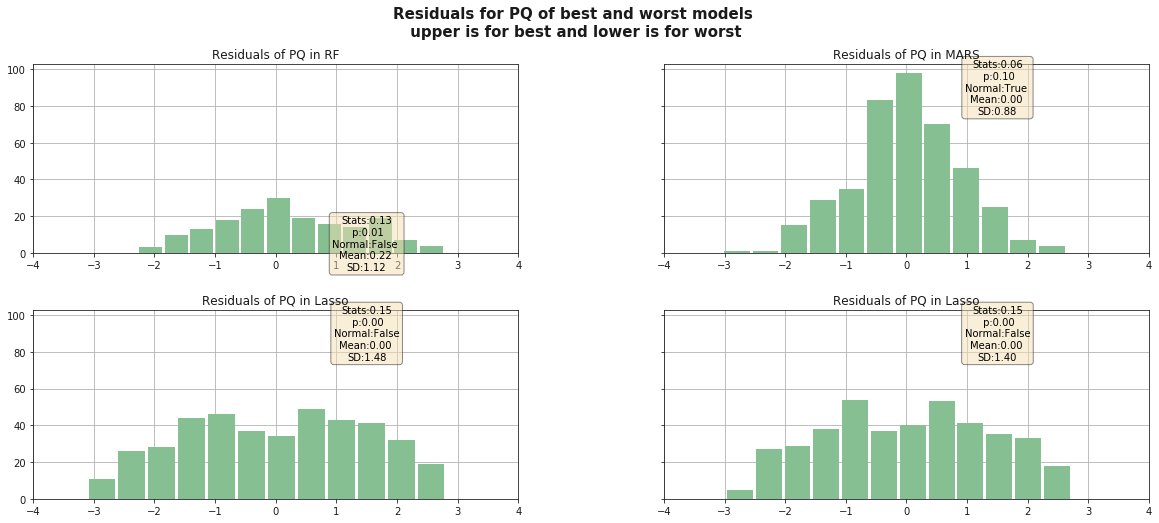

In [8]:
# for PQ

# best models
xl_best1 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_PCA_0.8_predictions.xlsx',sheet_name='Random Forest')
xl_best2 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_transformed_PCA_0.8_predictions.xlsx',
                      sheet_name='MARS')

# worst models
xl_worst1 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_transformed_predictions.xlsx',sheet_name='Lasso Regression')
xl_worst2 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_predictions.xlsx',sheet_name='Lasso Regression')

fig ,ax = plt.subplots(2,2,figsize=(20,8),sharey=True)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# best models
xl_best1.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][0])
stats, p = kstest(xl_best1['Residuals_PQ'],'norm')
mean = xl_best1['Residuals_PQ'].mean()
sd = xl_best1['Residuals_PQ'].std()
# place text
ax[0][0].text(1.5,max(ax[0][0].get_yticks())-30,'Stats:%0.2f\n p:%0.2f\nNormal:%s \nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[0][0].set_title('Residuals of PQ in RF')
ax[0][0].set_xlim((-4, 4))

stats, p = kstest(xl_best2['Residuals_PQ'].dropna(),'norm')
mean = xl_best2['Residuals_PQ'].mean()
sd = xl_best2['Residuals_PQ'].std()
xl_best2.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][1])
ax[0][1].text(1.5,max(ax[0][1].get_yticks())-30,'Stats:%0.2f\n p:%0.2f\nNormal:%s \nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[0][1].set_title('Residuals of PQ in MARS')
ax[0][1].set_xlim((-4, 4))


# worst models
stats, p = kstest(xl_worst1['Residuals_PQ'],'norm')
mean = xl_worst1['Residuals_PQ'].mean()
sd = xl_worst1['Residuals_PQ'].std()
xl_worst1.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][0])
ax[1][0].text(1.5,max(ax[1][0].get_yticks())-30,'Stats:%0.2f\n p:%0.2f\nNormal:%s\nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[1][0].set_xlim((-4, 4))

xl_worst2.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][1])
stats, p = kstest(xl_worst2['Residuals_PQ'],'norm')
mean = xl_worst2['Residuals_PQ'].mean()
sd = xl_worst2['Residuals_PQ'].std()
ax[1][1].text(1.5,max(ax[1][1].get_yticks())-30,'Stats:%0.2f\n p:%0.2f\nNormal:%s\nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[1][1].set_xlim((-4, 4))
# set_style(ax)
ax[1][0].set_title('Residuals of PQ in Lasso')
ax[1][1].set_title('Residuals of PQ in Lasso')

fig.suptitle("Residuals for PQ of best and worst models\n upper is for best and lower is for worst",weight='bold',fontsize=15)


'''
Though RF is having highest Adjusted R2 but the residuals doesnot follow normal distribution, which clearly
suggest that it cannot explain all the trends in the dataset and hence cannot be the best model
'''

Text(0.5,0.98,'Residuals for PQ of best and worst models\n upper is for best and lower is for worst')

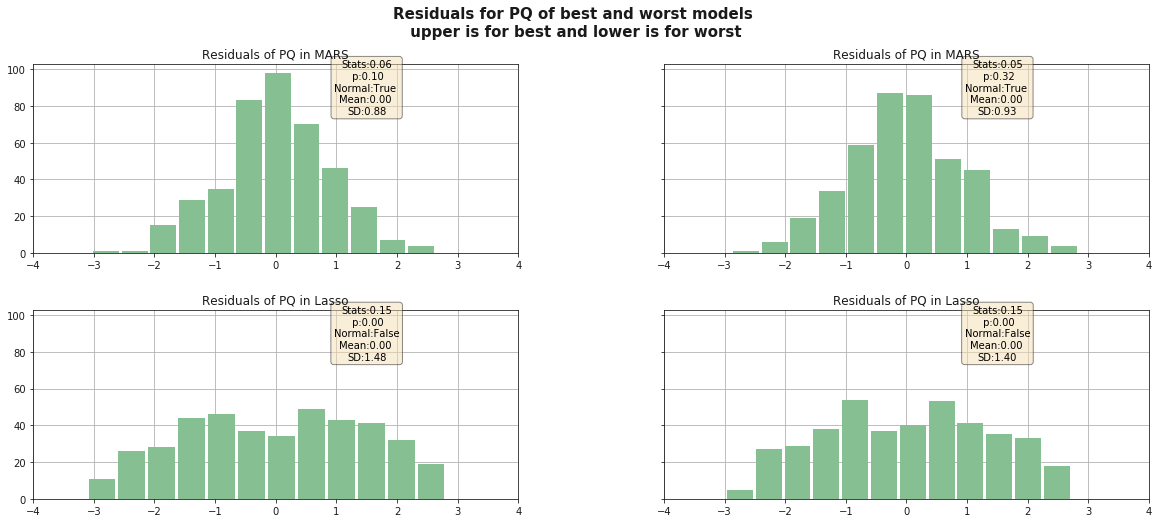

In [9]:
# for PQ

# best models
xl_best1 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_transformed_PCA_0.8_predictions.xlsx',
                      sheet_name='MARS')
xl_best2 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_PCA_0.8_predictions.xlsx',sheet_name='MARS')

# worst models
xl_worst1 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_transformed_predictions.xlsx',sheet_name='Lasso Regression')
xl_worst2 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_predictions.xlsx',sheet_name='Lasso Regression')

fig ,ax = plt.subplots(2,2,figsize=(20,8),sharey=True)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# best models
xl_best1.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][0])
stats, p = kstest(xl_best1['Residuals_PQ'],'norm')
mean = xl_best1['Residuals_PQ'].mean()
sd = xl_best1['Residuals_PQ'].std()
# place text
ax[0][0].text(1.5,max(ax[0][0].get_yticks())-30,'Stats:%0.2f\n p:%0.2f\nNormal:%s \nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[0][0].set_title('Residuals of PQ in MARS')
ax[0][0].set_xlim((-4, 4))

stats, p = kstest(xl_best2['Residuals_PQ'].dropna(),'norm')
mean = xl_best2['Residuals_PQ'].mean()
sd = xl_best2['Residuals_PQ'].std()
xl_best2.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][1])
ax[0][1].text(1.5,max(ax[0][1].get_yticks())-30,'Stats:%0.2f\n p:%0.2f\nNormal:%s \nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[0][1].set_title('Residuals of PQ in MARS')
ax[0][1].set_xlim((-4, 4))


# worst models
stats, p = kstest(xl_worst1['Residuals_PQ'],'norm')
mean = xl_worst1['Residuals_PQ'].mean()
sd = xl_worst1['Residuals_PQ'].std()
xl_worst1.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][0])
ax[1][0].text(1.5,max(ax[1][0].get_yticks())-30,'Stats:%0.2f\n p:%0.2f\nNormal:%s\nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[1][0].set_xlim((-4, 4))
xl_worst2.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][1])
stats, p = kstest(xl_worst2['Residuals_PQ'],'norm')
mean = xl_worst2['Residuals_PQ'].mean()
sd = xl_worst2['Residuals_PQ'].std()
ax[1][1].text(1.5,max(ax[1][1].get_yticks())-30,'Stats:%0.2f\n p:%0.2f\nNormal:%s\nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[1][1].set_xlim((-4, 4))
# set_style(ax)
ax[1][0].set_title('Residuals of PQ in Lasso')
ax[1][1].set_title('Residuals of PQ in Lasso')

fig.suptitle("Residuals for PQ of best and worst models\n upper is for best and lower is for worst",weight='bold',fontsize=15)


In [10]:
'''for ATT:
---Best---
1st - MARS for GA_Original_PCA_0.95PC
2nd - RF for GA_Transformed
---Worst--
1st - Elastic net GA_transformed
2nd - Elastic net GA_original'''

'for ATT:\n---Best---\n1st - MARS for GA_Original_PCA_0.95PC\n2nd - RF for GA_Transformed\n---Worst--\n1st - Elastic net GA_transformed\n2nd - Elastic net GA_original'

Text(0.5,0.98,'Residuals for ATT of best and worst models\n upper is for best and lower is for worst')

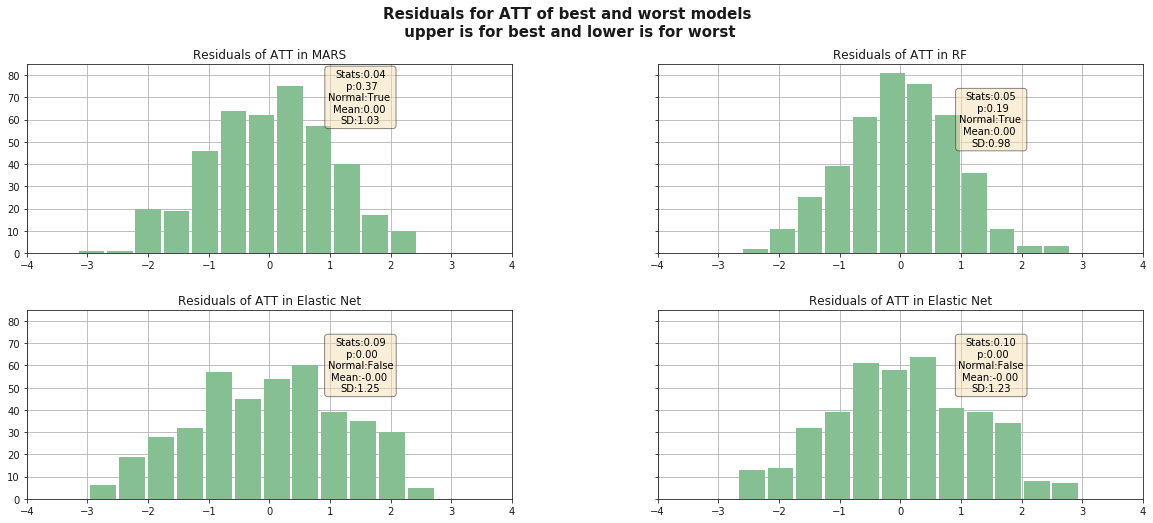

In [10]:
# for ATT

# best models
xl_best1 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_PCA_0.95_predictions.xlsx',sheet_name='MARS')

xl_best2 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_transformed_predictions.xlsx',sheet_name='Random Forest')

# worst models
xl_worst1 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_transformed_predictions.xlsx',sheet_name='Elastic Net')
xl_worst2 = pd.read_excel('study2_feature_selection_alltargets_mahalanobis_predictions.xlsx',sheet_name='Elastic Net')

fig ,ax = plt.subplots(2,2,figsize=(20,8),sharey=True)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

# best models
xl_best1.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][0])
stats, p = kstest(xl_best1['Residuals_ATT'].dropna(),'norm')
mean = xl_best1['Residuals_ATT'].dropna().mean()
sd = xl_best1['Residuals_ATT'].dropna().std()
# place text
ax[0][0].text(1.5,max(ax[0][0].get_yticks())-10,'Stats:%0.2f\n p:%0.2f\nNormal:%s \nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[0][0].set_title('Residuals of ATT in MARS')
ax[0][0].set_xlim((-4, 4))

stats, p = kstest(xl_best2['Residuals_ATT'],'norm')
mean = xl_best2['Residuals_ATT'].mean()
sd = xl_best2['Residuals_ATT'].std()
xl_best2.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[0][1])
ax[0][1].text(1.5,max(ax[0][1].get_yticks())-30,'Stats:%0.2f\n p:%0.2f\nNormal:%s \nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[0][1].set_title('Residuals of ATT in RF')
ax[0][1].set_xlim((-4, 4))


# worst models
stats, p = kstest(xl_worst1['Residuals_PQ'],'norm')
mean = xl_worst1['Residuals_ATT'].mean()
sd = xl_worst1['Residuals_ATT'].std()
xl_worst1.hist(column='Residuals_PQ', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][0])
ax[1][0].text(1.5,max(ax[1][0].get_yticks())-30,'Stats:%0.2f\n p:%0.2f\nNormal:%s\nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[1][0].set_xlim((-4, 4))
xl_worst2.hist(column='Residuals_ATT', bins=12, grid=True, color='#86bf91', zorder=2, rwidth=0.9, ax=ax[1][1])
stats, p = kstest(xl_worst2['Residuals_ATT'],'norm')
mean = xl_worst2['Residuals_ATT'].mean()
sd = xl_worst2['Residuals_ATT'].std()
ax[1][1].text(1.5,max(ax[1][1].get_yticks())-30,'Stats:%0.2f\n p:%0.2f\nNormal:%s\nMean:%0.2f \nSD:%0.2f'%(stats,p,p>0.05,mean,sd),
                           ha="center", va="center", color="black",bbox=props)
ax[1][1].set_xlim((-4, 4))
# set_style(ax)
ax[1][0].set_title('Residuals of ATT in Elastic Net')
ax[1][1].set_title('Residuals of ATT in Elastic Net')

fig.suptitle("Residuals for ATT of best and worst models\n upper is for best and lower is for worst",weight='bold',fontsize=15)